**AmirMahdi Zeighami**
<br> **401301316**
<br> بخش های مختلف خواسته شده در صورت سوال انجام شده است و نتایج شرح داده شده اند. این سوال برای ترکیبات مختلف شاعرهای مختلف نیز تست شده است که نتیجه ی نهایی مشابه(با مقادیر و نتایج متفاوت) به دست امده اند ولی در نهایت استدلال اتفاقات هر بخش مشابه هم بوده است که برای جلوگیری از شلوغی فایل از آوردن آن خودداری شده است.
<br> قابل ذکر است ک با توجه به مشکلات اینترنت و کمبود وقت و فشردگی کارها همچنین بزرگ بودن دیتاست، نتایج برای آموزش 5 ایپاک شرح داده شده است ولی روند اتفاقات مشابه حالتیست که آموزش با تعداد ایپاک بیشتر انجام شود
<br>  متاسفانه با توجه به بالا بودن حجم فایل مدل ها و اینکه این سوال روی کگل انجام شده است و نیازمند وی پی ان برای دانلود و به تبع آن سرعت پایین دانلود است، مدل ها ذخیره نشدند ولی نتایج به صورت کامل آورده شده است

In [1]:
!git clone https://github.com/amnghd/Persian_poems_corpus/

Cloning into 'Persian_poems_corpus'...
remote: Enumerating objects: 159, done.
remote: Total 159 (delta 0), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (159/159), 45.21 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import torch

In [3]:
!pip install transformers

In [4]:
!mkdir Dataset
# !mv Persian_poems_corpus/stop\ words\ removed/ Dataset
!mv Persian_poems_corpus/normalized/ Dataset
!rm -r Persian_poems_corpus

In [5]:
!ls Dataset/normalized/

abusaeed_norm.txt   hafez_norm.txt	  orfi_norm.txt
amir_norm.txt	    hatef_norm.txt	  ouhadi_norm.txt
anvari_norm.txt     helali_norm.txt	  parvin_norm.txt
asad_norm.txt	    iqbal_norm.txt	  rahi_norm.txt
asadi_norm.txt	    jami_norm.txt	  razi_norm.txt
attar_norm.txt	    kamal_norm.txt	  roodaki_norm.txt
babaafzal_norm.txt  khaghani_norm.txt	  saadi_norm.txt
bahaee_norm.txt     khajoo_norm.txt	  saeb_norm.txt
bahar_norm.txt	    khayyam_norm.txt	  salman_norm.txt
bidel_norm.txt	    khosro_norm.txt	  sanaee_norm.txt
eraghi_norm.txt     manoochehri_norm.txt  seyf_norm.txt
farrokhi_norm.txt   moulavi_norm.txt	  shabestari_norm.txt
ferdousi_norm.txt   naserkhosro_norm.txt  shahnematollah_norm.txt
feyz_norm.txt	    nezari_norm.txt	  shahriar_norm.txt
ghaani_norm.txt     obeyd_norm.txt	  vahshi_norm.txt
gilani_norm.txt     onsori_norm.txt	  zahir_norm.txt


لیست فایل های مربوط به شاعرهای مختلف مشاهده می شود. ده شاعر به دلخواه انتخاب شده است

In [6]:
import os 
filesName = ['hafez_norm.txt', 'bahar_norm.txt', 'hatef_norm.txt', 'moulavi_norm.txt', 'saeb_norm.txt',
             'saadi_norm.txt', 'shahriar_norm.txt', 'khayyam_norm.txt', 'bidel_norm.txt', 'khajoo_norm.txt']


for i in range(10):
    fid = open("Dataset/normalized/" + filesName[i], encoding = 'utf-8').read().strip().split('\n')
    while("" in fid):
        fid.remove("")
#     fid = open("Dataset/normalized/" + filesName[i], encoding = 'utf-8').read().strip().split('\n')
    if(i == 0):
        p0 = fid
    elif(i == 1) :
        p1 = fid
    elif(i == 2) :
        p2 = fid
    elif(i == 3) :
        p3 = fid
    elif(i == 4) :
        p4 = fid
    elif(i == 5) :
        p5 = fid
    elif(i == 6) :
        p6 = fid
    elif(i == 7) :
        p7 = fid
    elif(i == 8) :
        p8 = fid
    elif(i == 9) :
        p9 = fid

nEachClass = torch.tensor([len(p0), len(p1), len(p2), len(p3), len(p4),
       len(p5), len(p6), len(p7), len(p8), len(p9)])
print(nEachClass)

tensor([ 9435, 41641,  3567, 52956, 15003, 31381,  3812,  1286, 64665, 17693])


با توجه به بالانس نبودن دیتاست، وزن مربوط به هر کلاس محاسبه می شود

In [7]:
totalSamplesNumber = sum(nEachClass)
weights = totalSamplesNumber / (10 * nEachClass/totalSamplesNumber)
weights /= sum(weights)
weights

tensor([0.0646, 0.0146, 0.1710, 0.0115, 0.0407, 0.0194, 0.1600, 0.4742, 0.0094,
        0.0345])

یک نمونه از هر شاعر پرینت می شود

In [8]:
print(p0[0])
print(p1[0])
print(p2[0])
print(p3[0])
print(p4[0])
print(p5[0])
print(p6[0])
print(p7[0])
print(p8[0])
print(p9[0])

الا یا ایها الساقی ادر کاسا و ناولها
ز شعر قدر و بها یافتند اگر شعرا
سوی خود خوان یک رهم تا تحفه جان آرم تو را
بشنو این نی چون شکایت می کند
ای سواد عنبرین فامت سویدای زمین
اول دفتر به نام ایزد دانا
گذار آرد مه من گاهگاه از اشتباه اینجا
برخیز و بیا بتا برای دل ما
آیینه بر خاک زد صنع یکتا
ای غره ماه از اثر صنع تو غرا


در این قسمت کلاس های مختلف با هم ترکیب می شوند. توجه شود که شافل شدن دیتاست در دیتالودر انجام می شود

In [9]:
data = p0 + p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9
labels = torch.cat((0 * torch.ones(len(p0)), 1 * torch.ones(len(p1)), 2 * torch.ones(len(p2)),
                      3 * torch.ones(len(p3)), 4 * torch.ones(len(p4)), 5 * torch.ones(len(p5)),
                     6 * torch.ones(len(p6)), 7 * torch.ones(len(p7)), 8 * torch.ones(len(p8)),
                     9 * torch.ones(len(p9))))
# labels = torch.cat((0 * torch.ones(10000), 1 * torch.ones(10000), 2 * torch.ones(10000),
#                       3 * torch.ones(10000), 4 * torch.ones(10000), 5 * torch.ones(10000),
#                      6 * torch.ones(10000), 7 * torch.ones(10000), 8 * torch.ones(10000),
#                      9 * torch.ones(10000)))

In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


ساخت دیتاست در این قسمت صورت می گیرد. این قسمت با الهام از نمونه کد موجود در اینترنت نوشته شده است 

In [11]:
class poemDataset(torch.utils.data.Dataset):

    def __init__(self, poem, label, tokenizer, maxLength):
        self.tokenizer = tokenizer
        self.data = poem
        self.comment_text = poem
        self.targets = label
        self.max_len = maxLength

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return torch.tensor(ids, dtype=torch.long), torch.tensor(mask, dtype=torch.long), torch.tensor(token_type_ids, dtype=torch.long), torch.nn.functional.one_hot(torch.tensor(self.targets[index], dtype=torch.long), 10)

In [12]:
maxLength = 20
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased")
dataSet = poemDataset(data, labels, tokenizer, maxLength)
len(dataSet)

Downloading:   0%|          | 0.00/440 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

241439

In [13]:
trainRatio = 0.7
validRatio = 0.15
testRatio = 0.15
totalLen = len(dataSet)
trainLen = int(totalLen * trainRatio)
validLen = int(totalLen * validRatio)
testLen = totalLen - trainLen - validLen

trainDataSet, validDataSet, testDataSet = torch.utils.data.random_split(dataSet, [trainLen, validLen, testLen])

In [14]:
batchSize = 32
trainDataLoader = torch.utils.data.DataLoader(trainDataSet, shuffle = True, batch_size = batchSize)
validDataLoader = torch.utils.data.DataLoader(validDataSet, shuffle = True, batch_size = batchSize)
testDataLoader = torch.utils.data.DataLoader(testDataSet, shuffle = True, batch_size = batchSize)

برای بخش اوّل که فقط بخش کلیسیفیکشن آموزش داده می شود، مدل ده کلاسه خوانده می شود و آموزش داده می شود

In [15]:
modelP1 = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10, output_attentions = False, output_hidden_states = False)

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [16]:
print(modelP1)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

تمامی پارامترها غیرقابل آموزش شده و فقط لایه های مربوط به کلیسیفیکشن قابل یادگیری می شوند

In [17]:
for name, param in modelP1.named_parameters():
    param.requires_grad = False
modelP1.bert.pooler.dense.weight.requires_grad = True
modelP1.bert.pooler.dense.bias.requires_grad = True
modelP1.classifier.weight.requires_grad = True
modelP1.classifier.bias.requires_grad = True

تابع نمایش ماتریس درهم‌ریختگی

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
def plotConfusionMatrix(target, pred):
    cm = confusion_matrix(torch.tensor(targets).cpu(), torch.tensor(pred))
    display = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(10,10))
    display.plot(ax=ax, xticks_rotation='vertical')
    plt.show()

تابع آموزش که مانند نمونه کد تورچ است و در تمرینات قبل نیز قابل مشاهده است. برای تست و ارزیابی نیست تابع دیگری نوشته شده است که دقت، خطا، پیش بینی‌ها به همراه تارگت‌های اصلی مدل را بر‌میگرداند که از دو مقدار آخر برای رسم ماتریس در هم ریختگی استفاده می شود

In [18]:
def train(model, trainLoader, validLoader, lossFn, optim, sch, epochs, path):
    model.train()
    model = model.to(device)
    trainLosses = []
    trainAccs = []
    validLosses = []
    validAccs = []
    bestValidAcc = 0
    for epoch in range(epochs):
        for batch,(ids, mask, token_type_ids, targets) in enumerate(tqdm(trainLoader)):
            ids = ids.to(device, dtype = torch.long)
            mask = mask.to(device, dtype = torch.long)
            token_type_ids = token_type_ids.to(device, dtype = torch.long)
            targets = targets.to(device, dtype = torch.float)
            yhat = model(ids, mask, token_type_ids)
            yhat = yhat.logits
            optim.zero_grad()
            loss = lossFn(yhat, targets)
            loss.backward()
            optim.step()
        sch.step()
        trainLoss, trainAcc, _, _ = evaluate(model, trainLoader, lossFn)
        valLoss, valAcc, _, _ = evaluate(model, validLoader, lossFn)
        if valAcc > bestValidAcc:
            torch.save(model.state_dict(), path)
            bestValidAcc = valAcc
        trainLosses.append(trainLoss)
        trainAccs.append(trainAcc)
        validLosses.append(valLoss)
        validAccs.append(valAcc)
        print(f"Epoch#{epoch}: TrainLoss : {trainLoss} TrainAcc : {trainAcc} ValidLoss : {valLoss} ValidAcc : {valAcc}")
    return trainLosses, trainAccs, validLosses, validAccs
def evaluate(model, dataLoader, lossFn):
    model.eval()
    model = model.to(device)
    loss = 0
    nTrue = 0
    nTotal = 0
    allPred = []
    allTarget = []
    for batch,(ids, mask, token_type_ids, targets) in enumerate(tqdm(dataLoader)):
        ids = ids.to(device, dtype = torch.long)
        mask = mask.to(device, dtype = torch.long)
        token_type_ids = token_type_ids.to(device, dtype = torch.long)
        targets = targets.to(device, dtype = torch.float)
        yhat = model(ids, mask, token_type_ids)
        yhat = yhat.logits
        loss += lossFn(yhat, targets).item()
        nTotal += targets.shape[0]
        nTrue += sum(yhat.argmax(dim = 1) == targets.argmax(dim = 1))
        allPred.extend(yhat.argmax(dim = 1))
        allTarget.extend(targets.argmax(dim = 1))
    accuracy = nTrue / nTotal
    return loss/batch, accuracy, allTarget, allPred

برای آموزش از اسکجولر نیز استفاده شده است که در ایپاک های کمتر به دقت بالاتر برسیم

In [20]:
lr = 3e-4
epochs = 5

lossFn = torch.nn.BCEWithLogitsLoss(weight = weights.to(device))
optim = torch.optim.Adam(modelP1.parameters(), lr = lr)
sch = torch.optim.lr_scheduler.StepLR(optim, step_size=2, gamma=0.1)

bestModelPath = 'BestQ3P1.pth'
trainLosses, trainAccs, validLosses, validAccs = train(modelP1, trainDataLoader, validDataLoader, lossFn, optim, sch, epochs, bestModelPath)

  0%|          | 0/5282 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py

Epoch#0: TrainLoss : 0.008532021194431897 TrainAcc : 0.474075049161911 ValidLoss : 0.008567224389269856 ValidAcc : 0.47074416279792786


100%|██████████| 1132/1132 [00:36<00:00, 31.33it/s]


Epoch#1: TrainLoss : 0.008040243027708146 TrainAcc : 0.5000976324081421 ValidLoss : 0.008199674949983743 ValidAcc : 0.4936352074146271


100%|██████████| 1132/1132 [00:35<00:00, 32.01it/s]


Epoch#2: TrainLoss : 0.00781322147572352 TrainAcc : 0.5108486413955688 ValidLoss : 0.00804342859618985 ValidAcc : 0.5050669312477112


100%|██████████| 1132/1132 [00:35<00:00, 31.85it/s]


Epoch#3: TrainLoss : 0.007757251461508602 TrainAcc : 0.5125705003738403 ValidLoss : 0.008033147243129058 ValidAcc : 0.5059229731559753


100%|██████████| 1132/1132 [00:35<00:00, 31.83it/s]


Epoch#4: TrainLoss : 0.007710201234751252 TrainAcc : 0.5169548988342285 ValidLoss : 0.007989497526337177 ValidAcc : 0.5087946653366089


در آموزش با ایپاک های بیشتر مشاهده شد که میزان دقت و خسارت تغییر آنچنانی نمیکند و روی همین مقادیر باقی میماند

مقادیر خسارت و دقت برای آموزش و ولیدیشن در بالا در ایپاک های مختلف مشاهده میشود. بهترین مدل نیز ذخیره شده است و در قسمت بعد برای محاسبه ی پارامترها از آن استفاده می‌شود

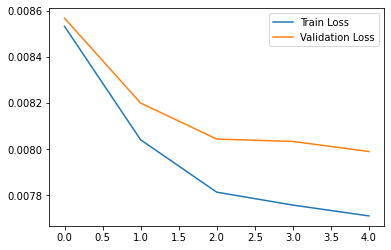

In [21]:
from matplotlib import pyplot as plt
plt.plot(trainLosses)
plt.plot(validLosses)
plt.legend(['Train Loss', 'Validation Loss'])

در این قسمت بهترین مدل بر اساس دقت ولیدیشن خوانده می شود و دیتای تست با آن تست می شود و هم چنین ماتریس در هم ریختگی نیز رسم می شود

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Test Loss : 0.007881459928258502, Test Accuracy : 0.5143716931343079, F1 Micro Score : 0.5143717038959604


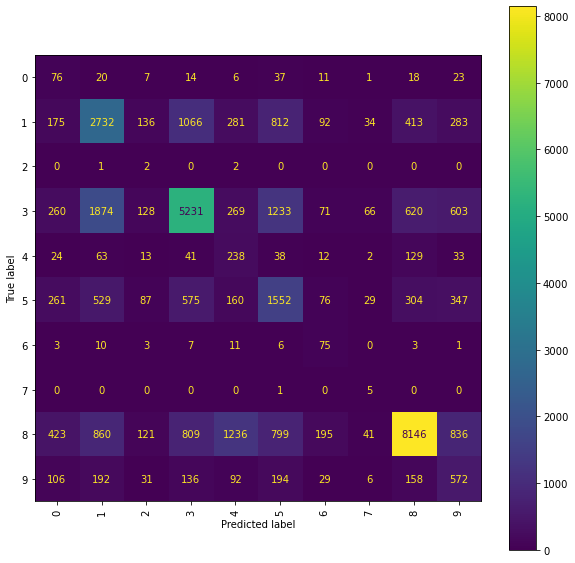

In [22]:
bestP1 = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)
bestP1.load_state_dict(torch.load('BestQ3P1.pth'))
testLoss, testAccuracy, pred, targets = evaluate(bestP1, testDataLoader, lossFn)
F1Score = metrics.f1_score(torch.tensor(targets).cpu(), torch.tensor(pred).cpu(), average='micro')
print(f"Test Loss : {testLoss}, Test Accuracy : {testAccuracy}, F1 Micro Score : {F1Score}")
plotConfusionMatrix(targets, pred)


اف 1 میکرو اسکور، خسارت و دقت در متن بالا قابل مشاهده است و ماتریس در هم ریختگی نیز رسم شده است. با توجه به بالانس نبودن دیتاست، ظاهرا شاعرهایی که بیت های بیشتری از آن ها در دیتاست موجود است بیشتر پیش بینی درست شده است

**فاین تیون کردن کل لایه ها برای قسمت دوم** 

In [23]:
modelP2Adam = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

آموزش با استفاده از ADAM

In [24]:
lr = 2e-5
epochs = 5

lossFn = torch.nn.BCEWithLogitsLoss(weight = weights.to(device))
optim = torch.optim.Adam(modelP2Adam.parameters(), lr = lr)
sch = torch.optim.lr_scheduler.StepLR(optim, step_size=3, gamma=0.1)

bestModelPath = 'BestQ3P2Adam.pth'
trainLosses, trainAccs, validLosses, validAccs = train(modelP2Adam, trainDataLoader, validDataLoader, lossFn, optim, sch, epochs, bestModelPath)

  0%|          | 0/5282 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 1132/1132 [00:36<00:00, 31.36it/s]


Epoch#0: TrainLoss : 0.005665060691958721 TrainAcc : 0.6729602813720703 ValidLoss : 0.00658937385528094 ValidAcc : 0.6363937258720398


100%|██████████| 1132/1132 [00:36<00:00, 31.34it/s]


Epoch#1: TrainLoss : 0.003768261907893979 TrainAcc : 0.7550811767578125 ValidLoss : 0.0060238273193438845 ValidAcc : 0.6644760370254517


100%|██████████| 1132/1132 [00:37<00:00, 30.49it/s]


Epoch#2: TrainLoss : 0.002125130898641118 TrainAcc : 0.8477281928062439 ValidLoss : 0.00619190213518344 ValidAcc : 0.6868976950645447


100%|██████████| 1132/1132 [00:36<00:00, 30.68it/s]


Epoch#3: TrainLoss : 0.0012373778632556048 TrainAcc : 0.8996491432189941 ValidLoss : 0.006713977213154336 ValidAcc : 0.699516773223877


100%|██████████| 1132/1132 [00:37<00:00, 30.41it/s]


Epoch#4: TrainLoss : 0.0008338177923388528 TrainAcc : 0.9328193664550781 ValidLoss : 0.007203834330892416 ValidAcc : 0.7022504210472107


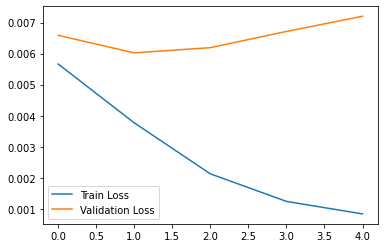

In [25]:
from matplotlib import pyplot as plt
plt.plot(trainLosses)
plt.plot(validLosses)
plt.legend(['Train Loss', 'Validation Loss'])

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Test Loss : 0.00692367736589012, Test Accuracy : 0.7091697454452515, F1 Micro Score : 0.7091697269238203


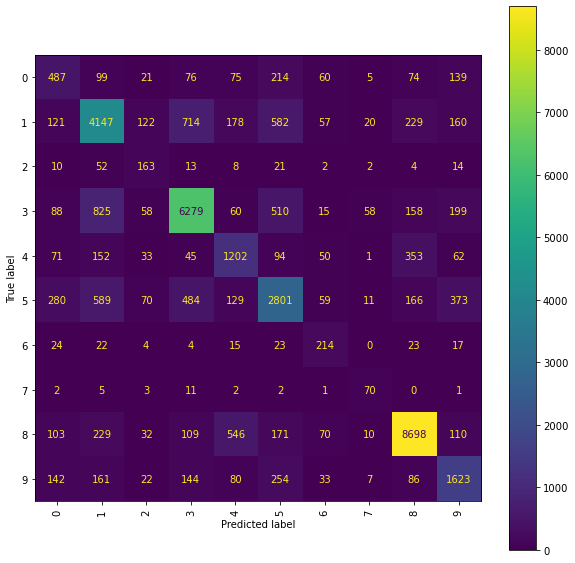

In [26]:
bestP2Adam = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)
bestP2Adam.load_state_dict(torch.load('BestQ3P2Adam.pth'))
testLoss, testAccuracy, pred, targets = evaluate(bestP2Adam, testDataLoader, lossFn)
F1Score = metrics.f1_score(torch.tensor(targets).cpu(), torch.tensor(pred).cpu(), average='micro')
print(f"Test Loss : {testLoss}, Test Accuracy : {testAccuracy}, F1 Micro Score : {F1Score}")
plotConfusionMatrix(targets, pred)


پارامترهای خواسته شده در صورت صوال پرینت شده اند. ماتریس درهم ریختگی قابل مشاهده است. در بخش دوم که کل مدل فاین تیون شده است، کلاس های مختلف با وجود بالانس نبودن دیتاست بهتر یاد گرفته شده اند(نسبت به قسمت قبل) و دقت در 5 ایپاک از قسمت آ بهتر شده است

با آموزش با تعداد ایپاک بیشتر مشاهده شد که تقریبا دقت ولیدیشن و تست نزدیک به 80 درصد میرسد و دقت آموزش نیز به 99 درصد می رسد که با توجه به مشکلات اشاره شده نتایج ذخیره نشدند که بیان شوند 

آموزش با SGD

In [22]:
modelP2SGD = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [23]:
lr = 3e-3
epochs = 5

lossFn = torch.nn.BCEWithLogitsLoss(weight = weights.to(device))
optim = torch.optim.SGD(modelP2SGD.parameters(), lr = lr, momentum = 0.9)
sch = torch.optim.lr_scheduler.StepLR(optim, step_size=10, gamma=0.1)

bestModelPath = 'BestQ3P2SGD.pth'
trainLosses, trainAccs, validLosses, validAccs = train(modelP2SGD, trainDataLoader, validDataLoader, lossFn, optim, sch, epochs, bestModelPath)

  0%|          | 0/5282 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 1132/1132 [00:36<00:00, 31.43it/s]


Epoch#0: TrainLoss : 0.009584348609018842 TrainAcc : 0.2705272436141968 ValidLoss : 0.00970359529581853 ValidAcc : 0.27027472853660583


100%|██████████| 1132/1132 [00:36<00:00, 31.38it/s]


Epoch#1: TrainLoss : 0.009278143912340752 TrainAcc : 0.3773038983345032 ValidLoss : 0.009403175837422081 ValidAcc : 0.37860000133514404


100%|██████████| 1132/1132 [00:36<00:00, 31.32it/s]


Epoch#2: TrainLoss : 0.008679485272344916 TrainAcc : 0.43531334400177 ValidLoss : 0.008833864688952342 ValidAcc : 0.4387408494949341


100%|██████████| 1132/1132 [00:36<00:00, 31.32it/s]


Epoch#3: TrainLoss : 0.008242129542604032 TrainAcc : 0.4623654782772064 ValidLoss : 0.008454511659738635 ValidAcc : 0.46370285749435425


100%|██████████| 1132/1132 [00:35<00:00, 31.79it/s]


Epoch#4: TrainLoss : 0.007905796936225895 TrainAcc : 0.4873940050601959 ValidLoss : 0.008168816397042334 ValidAcc : 0.4893552362918854


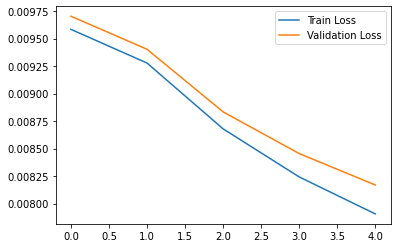

In [24]:
from matplotlib import pyplot as plt
plt.plot(trainLosses)
plt.plot(validLosses)
plt.legend(['Train Loss', 'Validation Loss'])

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Test Loss : 0.008171202642900768, Test Accuracy : 0.48780959844589233, F1 Micro Score : 0.4878095921804677


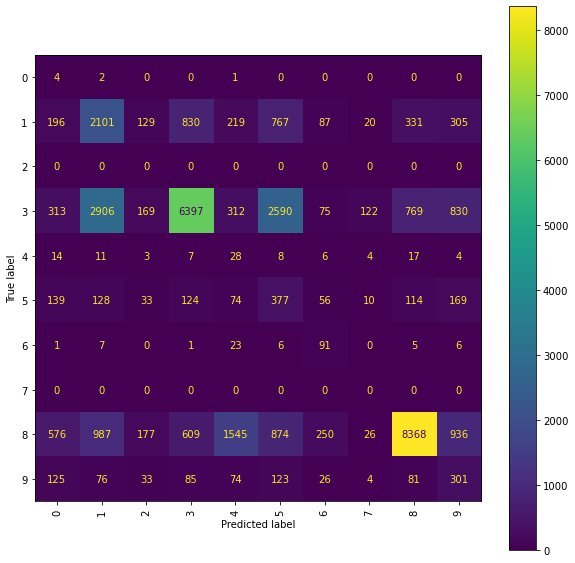

In [25]:
bestP2SGD = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)
bestP2SGD.load_state_dict(torch.load('BestQ3P2SGD.pth'))
testLoss, testAccuracy, pred, targets = evaluate(bestP2SGD, testDataLoader, lossFn)
F1Score = metrics.f1_score(torch.tensor(targets).cpu(), torch.tensor(pred).cpu(), average='micro')
print(f"Test Loss : {testLoss}, Test Accuracy : {testAccuracy}, F1 Micro Score : {F1Score}")
plotConfusionMatrix(targets, pred)


همانطور که مشاهده می شود دقت کمتر نسبت به قبل با آدام حاصل شد و ماتریس در هم ریختگی نیز نشان می دهد که شاعر با شعر بیشتر در دیتاست بهتر یاد گرفته شده است. همانطور که در 5 ایپاک مشاهده می شود، آدام سرعت همگرایی بهتری دارد و زودتر همگرا شده است و در نتیجه در 5 ایپاک دقت بهتر و خطای کمتر دارد

**محاسبه پرپلکسیتی برای قسمت سوم**
<br> برای محاسبه ی پرپلیکسیتی از رابطه زیر استفاده شده است :
<br> prplexity = exp(crossEntropyLoss)
<br> با توجه به اینکه هر 1000 داده را با هم نمیشد به مدل بدهم، یک دیتالودر با بچ سایز 100 نمونه‌ی شافل شده ساخته شده است و در طی 10 گام، نمونه‌های آن به مدل داده شده و لاس محموع محسابه می شود و در نهایت میانگین این 10 مقدار گرفته می شود و مقدار پرپلکسیتی محاسبه می شود

In [23]:
def prplexityCalculator(model):
    prplexityDataLoader = torch.utils.data.DataLoader(testDataSet, shuffle = True, batch_size = 100)
    lossFn = torch.nn.CrossEntropyLoss()
    loss = 0
    for i in range(10):
        ids, mask, token_type_ids, targets = next(iter(prplexityDataLoader))
        ids = ids.to(device, dtype = torch.long)
        mask = mask.to(device, dtype = torch.long)
        token_type_ids = token_type_ids.to(device, dtype = torch.long)
        targets = targets.to(device, dtype = torch.float)
        yhat = model(ids, mask, token_type_ids)
        yhat = yhat.logits
        loss += lossFn(yhat, targets).item()
    loss /= 10
    prPlexity = torch.exp(torch.tensor(loss))
    return prPlexity

مدل خام اولیه ابتدا خوانده می شود و پرپلکسیتی آن محاسبه می شود و سپس مدل ذخیره شده از قسمت قبل لود می شود و پرپلکسیتی مجددا برای شبکه جدید محاسبه می شود/
همانطور که مشاهده می شود، پرپلکسیتی بعد از آموزش بهتر از پرپلکسیتی قبل از آموزش کمتر است که بهتر است

In [25]:
device = 'cuda'
bestP2Adam = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased", num_labels = 10)
bestP2Adam = bestP2Adam.to(device)
prPlexityBefore = prplexityCalculator(bestP2Adam)
bestP2Adam.load_state_dict(torch.load('BestQ3P2Adam.pth'))
bestP2Adam = bestP2Adam.to(device)
prPlexityAfter = prplexityCalculator(bestP2Adam)
print(f"Perplexity Before Training : {prPlexityBefore}, Perplexity After Training : {prPlexityAfter}")

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Perplexity Before Training : 9.519895553588867, Perplexity After Training : 1.7085071802139282
